In [33]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-33-d867fd071f7d>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


In [1]:
# IMPORT from NYC_Neighborhood_Mapping.ipynb 

import urllib.request
import json
import math

url = 'https://data.cityofnewyork.us/resource/xyye-rtrs.json'

# Fetch the data from the URL
with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

# Use the data as needed
# print(data)

# Build dictionary

coordinates_to_neighborhood = {}
for neighborhood in data:
    if neighborhood['borough'] == "Manhattan":
        lat = neighborhood['the_geom']['coordinates'][1]
        lon = neighborhood['the_geom']['coordinates'][0]
        coordinates_to_neighborhood[tuple([lat, lon])] = neighborhood['name']

print(coordinates_to_neighborhood)

# Get most likely neighborhood

def get_neighborhood(lat, lon):
    closest_distance = math.inf
    closest_coordinates = None
    
    for key in coordinates_to_neighborhood:
        distance = abs(abs(lat) - abs(key[0])) + abs(abs(lon) - abs(key[1]))
        
        if distance < closest_distance:
            closest_distance = distance
            closest_coordinates = key
    
    return coordinates_to_neighborhood[closest_coordinates]

# get_neighborhood(40.87655077879968, -73.91065965862988)

{(40.87655077879968, -73.91065965862988): 'Marble Hill', (40.715618422314364, -73.99427936255985): 'Chinatown', (40.85190252555309, -73.93690027985242): 'Washington Heights', (40.86768396449919, -73.92121042203905): 'Inwood', (40.82360428481197, -73.94968791883373): 'Hamilton Heights', (40.81693442949784, -73.95738539351888): 'Manhattanville', (40.81597606742418, -73.94321112603912): 'Central Harlem', (40.79224946663037, -73.94418223148531): 'East Harlem', (40.77563857330185, -73.96050763135007): 'Upper East Side', (40.77592984988492, -73.94711784471833): 'Yorkville', (40.76811265828737, -73.95885968813766): 'Lenox Hill', (40.762403730702246, -73.9494705736962): 'Roosevelt Island', (40.7876579985349, -73.9770592363061): 'Upper West Side', (40.773528889421705, -73.9853377700127): 'Lincoln Square', (40.758333686906404, -73.99640768221386): 'Clinton', (40.75469110270627, -73.98166882730311): 'Midtown', (40.74830307725222, -73.97833207924134): 'Murray Hill', (40.74403470674802, -74.0031163

In [2]:
import requests
import sys
import urllib, pandas as pd
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


#Fetching data from api.yelp.com

In [3]:
API_KEY= 'K834kO9dho-fzMVo_Y_Hd3FIcDSkOgvGE8kNAfCVOFnsxPmI6KwCfxP996vUxM54Yw6gk7s7l7SiuxrrxPVIHBiJCu38lpHYmg-RKXVzVHQ5lgzLo_nDZ_sCevlKZHYx'
API_HOST = 'https://api.yelp.com'
LIMIT = 50

In [4]:
def request(host, path, api_key, url_params):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()

def search(PATH, api_key, location, offset):
    url_params = {
        # 'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'offset': offset,
        'limit': 50
    }
    return request(API_HOST, PATH, api_key, url_params=url_params)


def getAllCategories(PATH, api_key, locale):
  params = {
      'locale' : locale
  }
  return request(API_HOST, PATH, api_key, url_params=params)

In [5]:
getCateory = '/v3/categories' 

response = getAllCategories(getCateory, API_KEY, 'en_US')
all_categories = response.get('categories')

In [6]:
print(len(all_categories))
print(all_categories[:1], end='\n')

1295
[{'alias': '3dprinting', 'title': '3D Printing', 'parent_aliases': ['localservices'], 'country_whitelist': [], 'country_blacklist': []}]


In [7]:
# download_csv('categories.csv', all_categories)

In [8]:
BSEARCH = '/v3/businesses/search'

In [42]:
def get_all_businesses(location: str): 
  data = []
  for offset in range(0, 1000, 50):
    try:
        response = search(BSEARCH, API_KEY, location, offset)
        print(f'offset at: {offset}')
        data += response['businesses']
    except HTTPError as error:
        sys.exit(
            'Encountered HTTP error {0} on {1}:\n {2}\nAbort program.'.format(
                error.code,
                error.url,
                error.read(),
            )
        )
  return data

In [40]:
yelp_data = []
ids= set()

data_keys = {'id' , 'review_count', 'categories', 'rating', 'coordinates', 'transactions'}

def format_lat_lon(item): 
  item['latitude'] = item['coordinates']['latitude']
  item['longitude'] = item['coordinates']['longitude']
  del item['coordinates']
  return item

def get_business_based_on_location(locations: list[str]):
  for _location in locations:
    print(f"for location tag: {_location}")   
    data = get_all_businesses(_location)
    for data_item in data: 
      if data_item['id'] in ids: 
        continue
      ids.add(data_item['id'])
      data_subset = { k: data_item[k] for k in data_item.keys() if k in data_keys}
      data_subset = format_lat_lon(data_subset)
      yelp_data.append(data_subset) 

In [ ]:
newyorkcity = ['nyc', 'New York City']
get_business_based_on_location(newyorkcity)

In [12]:
print(len(ids))
print(len(yelp_data))

1102
1102


In [14]:
neighbourhoods_count = set()
for _data in yelp_data: 
  lat, lon = _data['latitude'], _data['longitude']
  n = get_neighborhood(lat, lon)
  neighbourhoods_count.add(n)
  _data['neighbourhood'] = n

print(f' {len(neighbourhoods_count)} Unique neighbourhoods found')

 33 Unique neighbourhoods found


In [ ]:
yelp_data[0]
yelp_data_df = pd.DataFrame(yelp_data)
len(yelp_data_df)

In [16]:
types_set = set()
for val in yelp_data_df['transactions']:
  for i in val:
    types_set.add(i)
types_set

{'delivery', 'pickup', 'restaurant_reservation'}

In [17]:
yelp_data_df.drop(['transactions', 'latitude', 'longitude'], inplace=True, axis=1)
yelp_data_df.columns

Index(['id', 'review_count', 'categories', 'rating', 'neighbourhood'], dtype='object')

In [20]:
##INVALID data checks 

sample_df = yelp_data_df.copy()
invalid = sample_df[sample_df[['rating', 'review_count']].isna().any(axis=1)]
invalid

,id,review_count,categories,rating,neighbourhood


In [ ]:
def display_hist(df, title): 
    df.hist(bins=40)
    plt.xlabel(title)
    plt.ylabel("Count of Business or Services")
    plt.show()

display_hist(yelp_data_df['review_count'], 'review_count') 
display_hist(yelp_data_df['rating'], 'rating') 

# Calculate Scores

In [22]:
def calculate_add_scores(dataf): 
  min, max = dataf['count_of_businesses'].min(), dataf['count_of_businesses'].max() 
  dataf['normalised_scores'] = round(((dataf['count_of_businesses'] - min) / (max - min)) * 100 , 2)
  return dataf

In [ ]:
yelp_data_df['count_of_businesses'] = yelp_data_df.groupby('neighbourhood')['neighbourhood'].transform('size')

scores_by_yelp_df = yelp_data_df.groupby('neighbourhood').size().reset_index(name='count_of_businesses')
scores_by_yelp_df = calculate_add_scores(scores_by_yelp_df)
scores_by_yelp_df

<ipython-input-68-c815f1984337>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(scores_by_yelp_df['neighbourhood'], rotation='vertical')


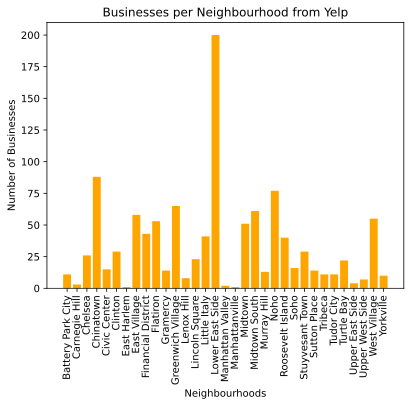

In [68]:
fig, ax = plt.subplots()
bars = ax.bar(scores_by_yelp_df['neighbourhood'], scores_by_yelp_df['count_of_businesses'], color='orange')

ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of Businesses')
ax.set_title('Businesses per Neighbourhood from Yelp')
ax.set_xticklabels(scores_by_yelp_df['neighbourhood'], rotation='vertical')

plt.show()

In [24]:
import csv
from google.colab import files

def download_csv(fname, df):
  csvdata = df.to_csv()
  with open(fname, 'w') as f:
    f.write(csvdata)
  !cat fname
  files.download(fname)

download_csv('data_from_yelp.csv', yelp_data_df)
download_csv('neighbourhood_scores_from_yelp.csv', scores_by_yelp_df)

cat: fname: No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cat: fname: No such file or directory


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>